<a href="https://colab.research.google.com/github/wasimkhan33/Bank_Marketing_Effectiveness_Prediction/blob/main/Bank_Marketing_Effectiveness_Prediction_Capstone_Project_3_(Individual).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

# Import libraries & Loading Dataset

In [ ]:
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone 3/My 1/bank-full.csv', sep=";")
data = df.copy()

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
data.shape

(45211, 17)

In [ ]:
# Attribute Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
# Checking missing values
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

As we can see there are no missing values present in the dataset. We don’t need to impute any missing values.

In [ ]:
# Unique values in all columns
for column in data.columns:
    print(column,data[column].nunique())

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
y 2


#Descriptive Analysis
 - We have two types of variables in our data set. These are Continuous 
Variables and Categorical Variables.

Source - https://www.tutorialspoint.com/python_pandas/python_pandas_descriptive_statistics.htm

In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
data.describe(include=['object'])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [ ]:
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numerical = [x for x in data.columns.to_list() if x not in categorical]
numerical.remove('y')

In [ ]:
print('Categorical features:', categorical)
print('Numerical features:', numerical)

Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


#EDA

Let’s see how our target variable i.e. y distribution looks like.


Target Variable : y - has the client subscribed a term deposit? (binary: 'yes','no') 

In [ ]:
data['y'].value_counts(normalize=True)*100

no     88.30152
yes    11.69848
Name: y, dtype: float64

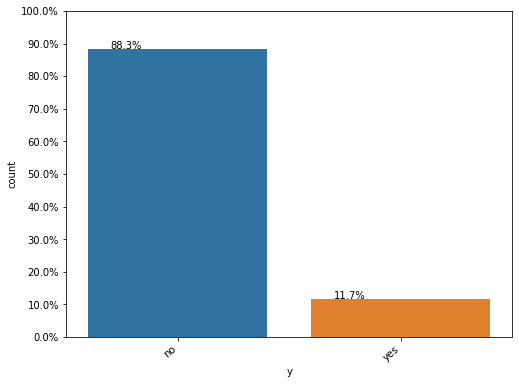

In [ ]:
  plt.figure(figsize=(8,6))
  Y = data["y"]
  total = len(Y)*1.
  ax=sns.countplot(x="y", data=data)
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

- From this data we can see that 88% customers did not subscribed for Term deposit


From the above plot we can observe that our dataset is highly imbalanced. Majority of the data points belong to no class. Ratio of No class to yes class is 8:1.

# Univariate Analysis

Let’s start doing EDA on rest of the columns of the datapoints.


**Feature: Job (Categorical variable)**

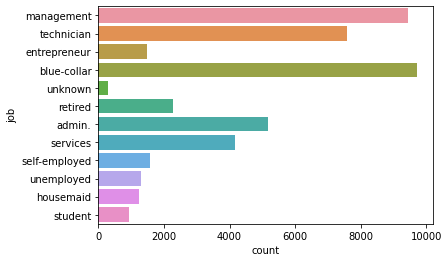

In [ ]:
sns.countplot(y='job', data=data)

From the above distribution we can see that most of the customers have jobs as "management", "blue-collar" or "technician". One interesting thing to find out would be to see the distribution for each classes as well. For example, how many people who work as an admin have subscribed a term deposit.

**Feature: Marital (Categorical feature)**

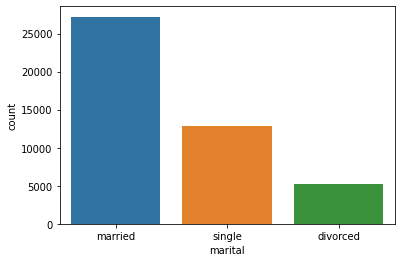

In [ ]:
sns.countplot(x='marital', data=data)

Client who married are high in records in given dataset and divorced are less

**Feature: default (categorical)**

This is a categorical feature which means "has credit in default", with the values "yes" and "no".

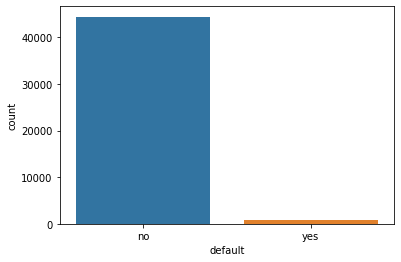

In [ ]:
sns.countplot(x='default', data=data)

defualt feature seems to be does not play important role as it has value of no at high ratio to value yes which can drop


**Feature: Education**

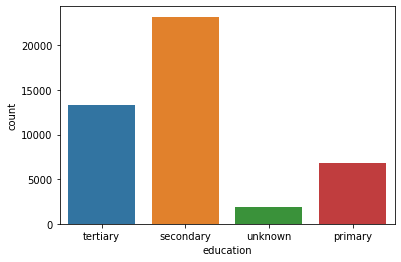

In [ ]:
sns.countplot(x='education', data=data)

Client whose education background is secondary are in high numbers in given dataset


**Feature: housing (Categorical)**

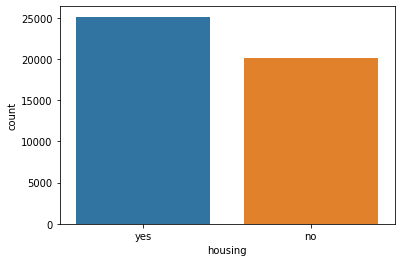

In [ ]:
sns.countplot(x='housing', data=data)

People with housing loan are the most ones who have been contacted by the bank followed by people with no housing loan.

**Feature: loan (Categorical)**

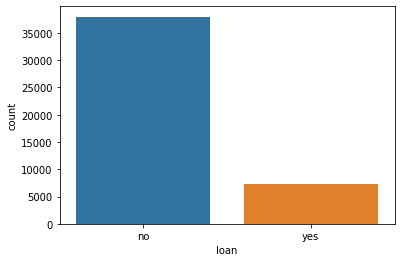

In [ ]:
sns.countplot(x='loan', data=data)

People with no personal loan are the most ones.

**Feature: contact (Categorical)**

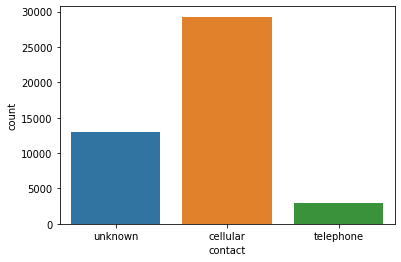

In [ ]:
sns.countplot(x='contact', data=data)

**Feature: month (Categorical)**

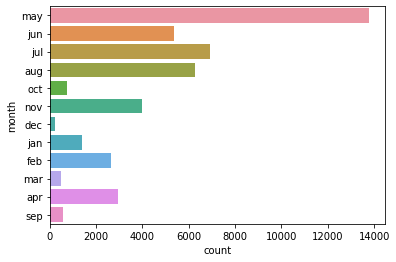

In [ ]:
sns.countplot(y='month', data=data)

Data in month of may is high and less in Dec

**Feature: poutcome (Categorical)**

This feature indicates the outcome of the previous marketing campaign

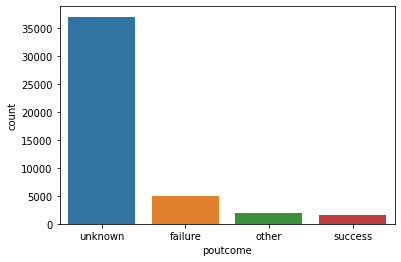

In [ ]:
sns.countplot(x='poutcome', data=data)

Majority of the outcome of the previous campaign is Non-Existent. Very few people counts who successfully subscribed from previous marketing strategy.


In [ ]:
def plot_cat_data(df,dep_var):
  cat_columns = list(set(df.describe().columns)^set(df.columns))
  cat_columns.remove(dep_var)
  for i,e in enumerate(cat_columns):
    plt.figure(i)
    ax = sns.countplot(df[e],hue=df[dep_var])
    for p in ax.patches:
      height = p.get_height()
      ax.text(p.get_x()+p.get_width()/2.,
              height + 3,
              '{:1.2f}'.format(height/df.shape[0]),
              ha="center")
    if(len(ax.patches)>10):
      plt.xticks(rotation=90)  
    plt.title(f'Count Plot for {e}')
    plt.show()

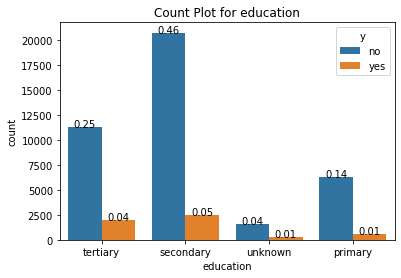

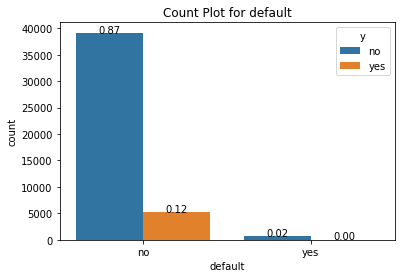

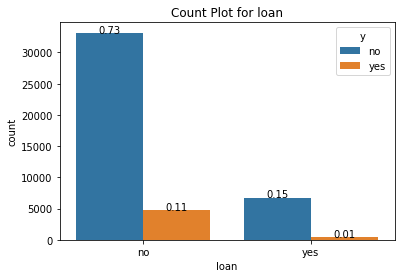

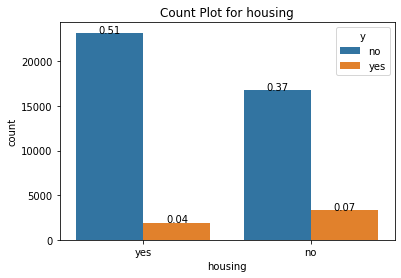

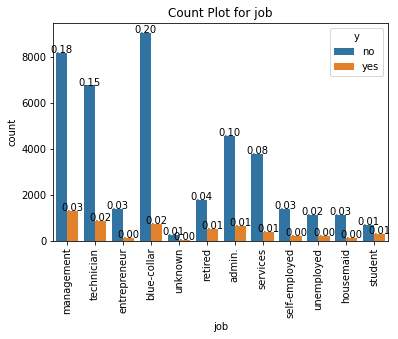

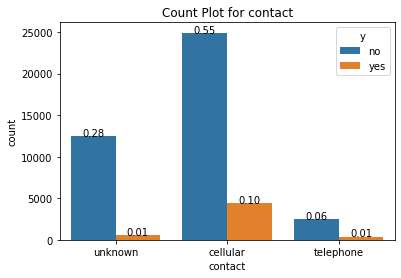

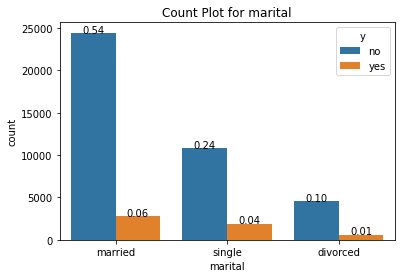

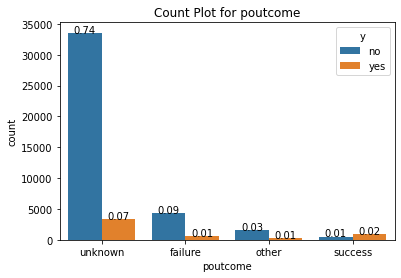

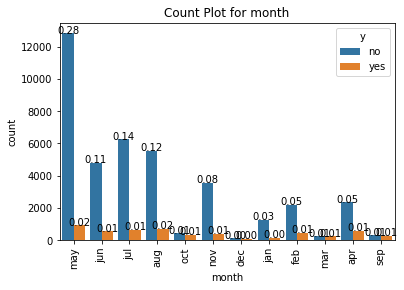

In [ ]:
plot_cat_data(data,'y')

- People with Secondary education qualification are the most who have subscribed for the deposits. They are also the most who have not subscribed for deposits.
- People with 'blue-collar' jobs have subscribed more for the deposits than people with any other profession
*   People who are married have subscribed for deposits more than people with any other marital status.
*   More people contacted on cellular by bank have subscribed the deposits offered by the bank than the ones contacted on telephone.
*   The month of the highest level of marketing activity was the month of May. However, it was also the month that potential clients tended to reject term deposits offers the most.
- People with default status as no are the most one’s who have and have not subscribed for bank deposits.
- People with no housing loan are the most ones who have subscribed for deposits.Most ones who have not subscribed for the deposits are having housing loans.
- People with no personal loan are the most ones who have not subscribed for the deposits offered by the bank and they are also the most ones who have subscribed for the deposits
- People whose previous outcome is non-existent have actually subscribed more than any other group of people belonging to previous outcome



**Explore the Numerical Features**

In [ ]:
# list of numerical variables
numerical_features = [feature for feature in data.columns if ((data[feature].dtypes != 'O') & (feature not in ['y']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
data[numerical_features].head()

Number of numerical variables:  7


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [ ]:
discrete_feature=[feature for feature in numerical_features if len(data[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


In [ ]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['y']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 7


In [ ]:
# converting call duration from seconds to minute
data['duration'] = data['duration']/60

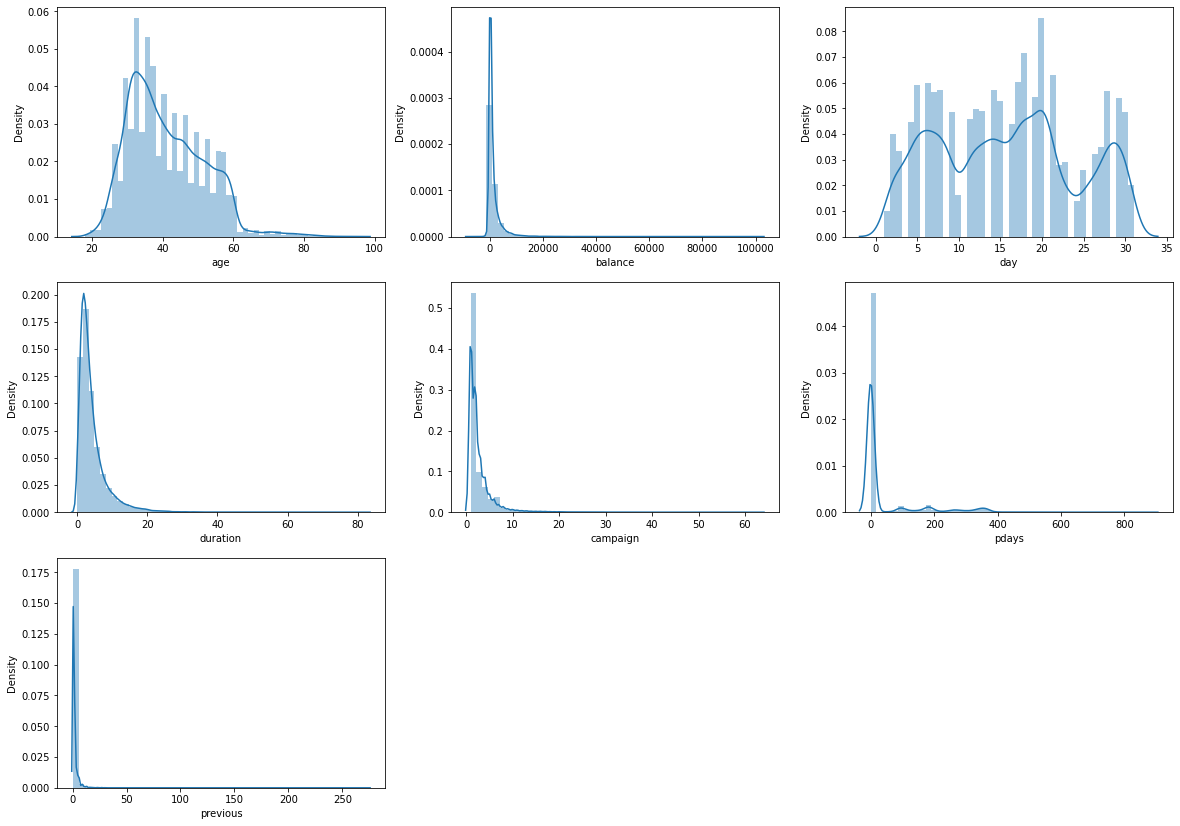

In [ ]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(data[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

**Take-away**: 
- it seems age, days distributed normally
- balance, duration, campaign, pdays and previous heavily skewed towards left and seems to be have some outliers.
- As we can see in the above distribution also, that most of the customers are in the age range of 30-40.

**Relation between Continous numerical Features and Labels**

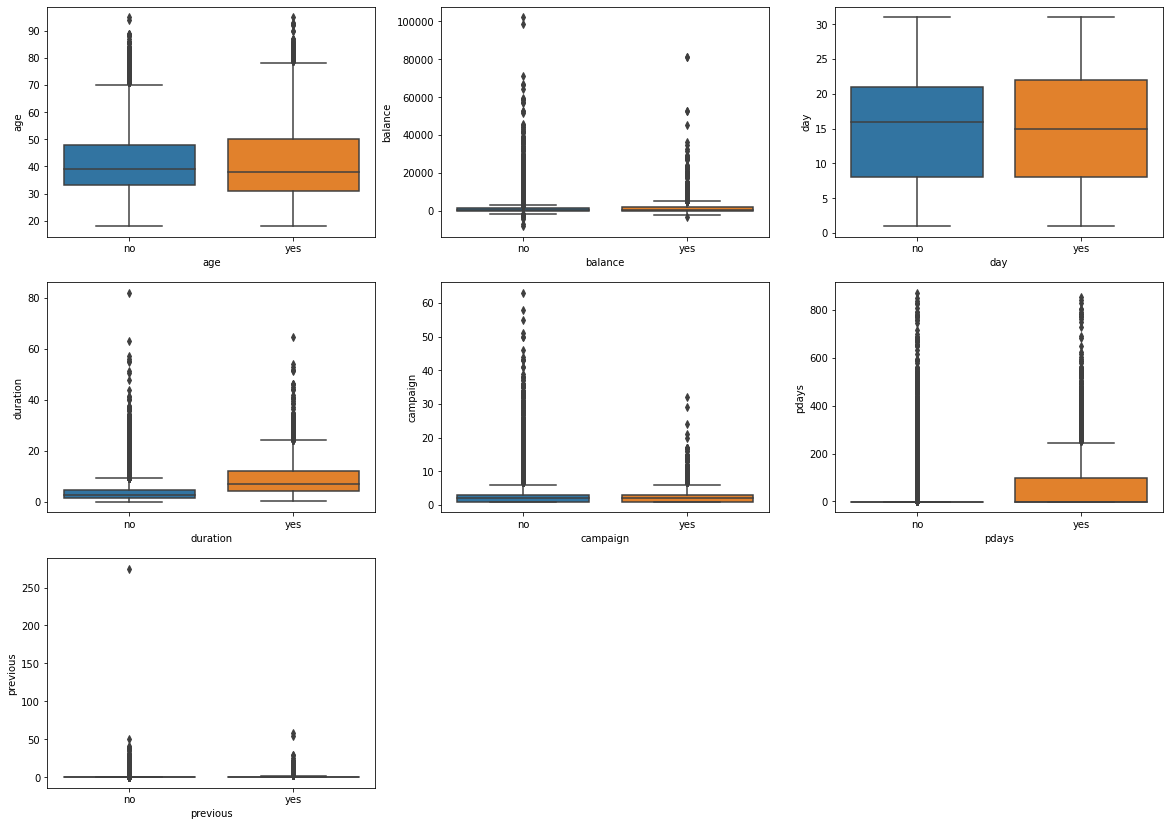

In [ ]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y= data[feature], data=data)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

**Take-away**:
- Client shows interest on deposit who had discussion for longer duration
- Both the customers that subscibed or didn't subscribe a term deposit, has a median age of around 38-40. And the boxplot for both the classes overlap quite a lot, which means that age isn't necessarily a good indicator for which customer will subscribe and which customer will not.

### Correlation Matrix of the numerical features

In [ ]:
# Convert target variable into numeric
data.y = data.y.map({'no':0, 'yes':1}).astype('uint8')

Text(0.5, 1.05, 'Pearson correlation of Features')

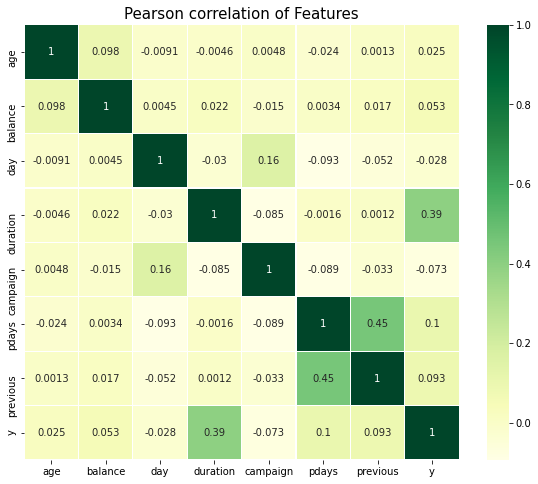

In [ ]:
# Idea of correlation matrix of numerical feature: https://medium.com/datadriveninvestor/introduction-to-exploratory-data-analysis-682eb64063ff
%matplotlib inline
corr = data.corr()

f, ax = plt.subplots(figsize=(10,8))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

From the above heatmap we can see that there are some numerical features which share a high correlation between them.

# Data Preprocessing

In [ ]:
### changing categorical variable to numerical variable

data[['housing','loan','default']]=data[['housing','loan','default']].replace(["yes","no"],["1","0"])
data['month']=data['month'].replace(["jan","feb","mar","apr","may","jun","jul", "aug","sep","oct","nov","dec"],["1","2","3","4","5","6","7","8","9","10","11","12"])
data['job']=data['job'].replace(['unknown'],['other'])
data['contact']=data['contact'].replace(['unknown'],['other'])

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,other,5,5,4.350000,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,other,5,5,2.516667,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,other,5,5,1.266667,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,other,5,5,1.533333,1,-1,0,unknown,0
4,33,other,single,unknown,0,1,0,0,other,5,5,3.300000,1,-1,0,unknown,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['job']=le.fit_transform(data['job'])
data['education']=le.fit_transform(data['education'])
data['poutcome']=le.fit_transform(data['poutcome'])
data['contact']=le.fit_transform(data['contact'])
data['marital']=le.fit_transform(data['marital'])


data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,1,5,5,4.350000,1,-1,0,3,0
1,44,10,2,1,0,29,1,0,1,5,5,2.516667,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,1,5,5,1.266667,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,1,5,5,1.533333,1,-1,0,3,0
4,33,5,2,3,0,1,0,0,1,5,5,3.300000,1,-1,0,3,0


Text(0.5, 1.05, 'Pearson correlation of Features')

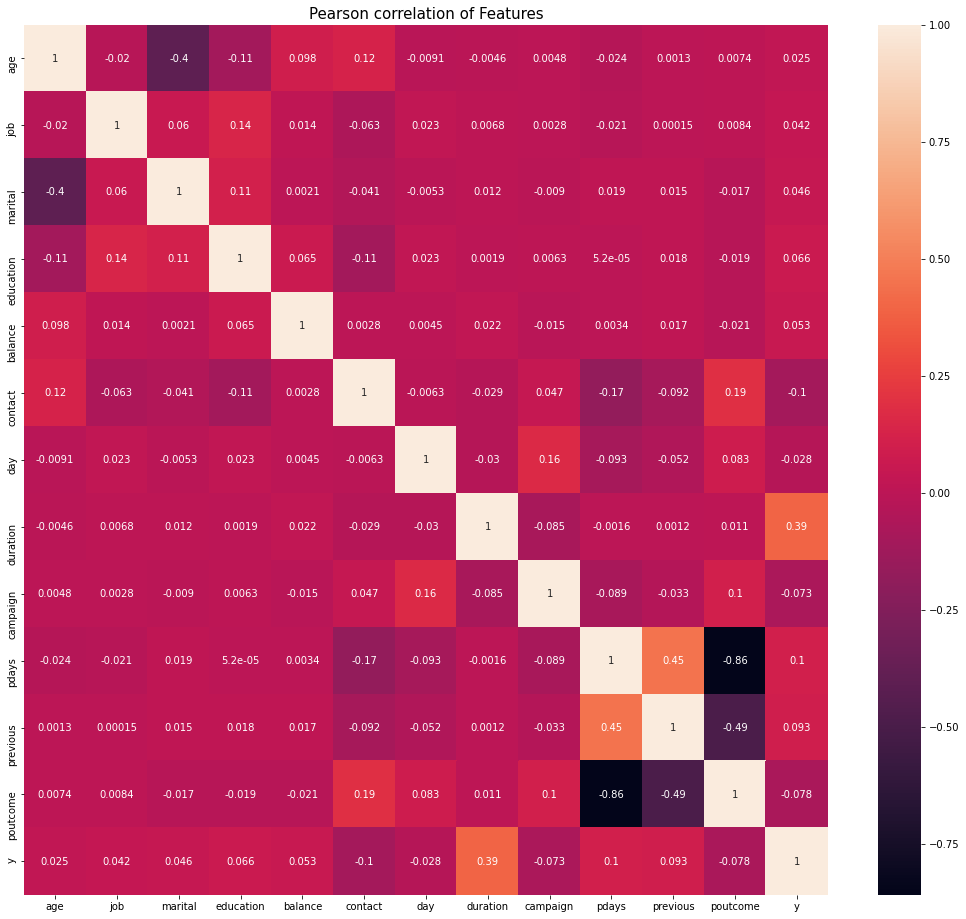

In [ ]:
import seaborn as sns
corr = data.corr()

f, ax = plt.subplots(figsize=(18,16))

sns.heatmap(corr, ax=ax, annot=True)

plt.title("Pearson correlation of Features", y=1.05, size=15)

#Feature Engineering

- Drop unwanted Features
- Handle Missing Values
- Handle Categorical Features
- Handle Feature Scalling
- Remove Outliers

As per Exploratory Data Analysis EDA, 
- no missing value found
- no feature found with one value
- 9 categorical features
- defaut features does not play imp role
- it seems some outliers found (age, balance, duration, compaign, pdays and previous has some outliers)

In [ ]:
#defaut features does not play imp role
data.groupby(['y','default']).size()

y  default
0  0          39159
   1            763
1  0           5237
   1             52
dtype: int64

In [ ]:
data.drop(['default'],axis=1, inplace=True)

In [ ]:
data['pdays'].count()

45211

In [ ]:
data.groupby(['y','pdays']).size()

y  pdays
0  -1       33570
    1           9
    2          35
    3           1
    4           1
            ...  
1   804         1
    805         1
    828         1
    842         1
    854         1
Length: 914, dtype: int64

In [ ]:
# drop pdays as it has -1 value for around 75%+ 
data.drop(['pdays'],axis=1, inplace=True)

### Outliers


In [ ]:
# remove outliers in feature age...
data.groupby('age',sort=True)['age'].count()
# these can be ignored and values lies in between 18 to 95

age
18     12
19     35
20     50
21     79
22    129
     ... 
90      2
92      2
93      2
94      1
95      2
Name: age, Length: 77, dtype: int64

In [ ]:
# remove outliers in feature balance...
data.groupby(['y','balance'],sort=True)['balance'].count()
# these outlier should not be remove as balance goes high, client show interest on deposit

y  balance
0  -8019      1
   -6847      1
   -4057      1
   -3372      1
   -3313      1
             ..
1   34646     1
    36252     1
    45248     1
    52587     2
    81204     2
Name: balance, Length: 9258, dtype: int64

In [ ]:
# remove outliers in feature duration...
data.groupby(['y','duration'],sort=True)['duration'].count()
# these outlier should not be remove as duration goes high, client show interest on deposit

y  duration 
0  0.000000      3
   0.016667      2
   0.033333      3
   0.050000      4
   0.066667     15
                ..
1  51.566667     1
   51.700000     1
   53.050000     1
   54.216667     1
   64.683333     1
Name: duration, Length: 2627, dtype: int64

In [ ]:
# remove outliers in feature campaign...
data.groupby(['y','campaign'],sort=True)['campaign'].count()

y  campaign
0  1           14983
   2           11104
   3            4903
   4            3205
   5            1625
               ...  
1  20              1
   21              1
   24              1
   29              1
   32              1
Name: campaign, Length: 70, dtype: int64

In [ ]:
data.groupby('campaign',sort=True)['campaign'].count()

campaign
1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
23       22
24       20
25       22
26       13
27       10
28       16
29       16
30        8
31       12
32        9
33        6
34        5
35        4
36        4
37        2
38        3
39        1
41        2
43        3
44        1
46        1
50        2
51        1
55        1
58        1
63        1
Name: campaign, dtype: int64

In [ ]:
data = data[data['campaign'] < 33]

In [ ]:
# remove outliers in feature previous...
data.groupby(['y','previous'],sort=True)['previous'].count()

y  previous
0  0           33532
   1            2189
   2            1650
   3             848
   4             543
               ...  
1  26              1
   29              1
   30              1
   55              1
   58              1
Name: previous, Length: 66, dtype: int64

In [ ]:
data['previous'].sort_values(ascending=False)

29182    275
38326     58
44089     55
28886     51
44822     41
        ... 
24819      0
24818      0
24817      0
24816      0
0          0
Name: previous, Length: 45173, dtype: int64

In [ ]:
data = data[data['previous'] < 31]

## Model Training

In [ ]:
##seprating independent and dependent variable

X = data.drop(['y'],axis=1)   #contain all  independent variable
y = data['y']                 #dependent variable
data['y'].value_counts()

0    39874
1     5287
Name: y, dtype: int64

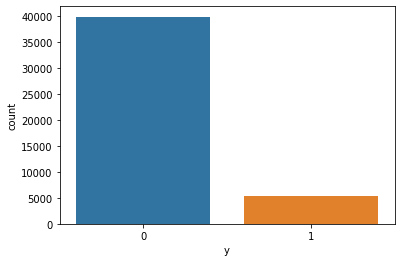

In [ ]:
# Handling imbalanced data

sns.countplot(x='y',data=data)

When observation in one class is higher than the observation in other classes then there exists a class imbalance. We can clearly see that there is a huge difference between the data set. Solving this issue we will use resampling technique.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score

#dividing the dataset into training and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3 ,random_state=0)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(31612, 14) (13549, 14) (31612,) (13549,)


## Function to generate model report and plot auc_roc curve

In [ ]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

In [ ]:
# def generate_auc_roc_curve_im(clf, X_test):
#     y_pred_proba = clf.predict_proba(X_test)[:, 1]
#     fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
#     auc = roc_auc_score(y_test, y_pred_proba)
#     plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
#     plt.plot([0, 1], [0, 1], linestyle='--')
#     plt.legend(loc=4)
#     plt.show()
#     pass

In [ ]:
# def generate_auc_roc_curve(clf, X_test, y_test):
#     y_pred_proba = clf.predict_proba(X_test)[:, 1]
#     fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)
#     auc = metrics.roc_auc_score(y_test, y_pred_proba)
#     plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
#     plt.plot([0, 1], [0, 1], linestyle='--')
#     plt.legend(loc=4)
#     plt.show()
#     pass

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics
import matplotlib.pyplot as plt


model=LogisticRegression()
model.fit(X_train,y_train)
y_pred1=model.predict(X_test)

#Scoring the model on train data
score_train=model.score(X_train, y_train)
print("Training score: %.2f " % score_train)

#Scoring the model on test_data
score_test=model.score(X_test, y_test)
print("Testing score: %.2f " % score_test)

Training score: 0.89 
Testing score: 0.89 


Confusion Matrix 

[[11715   244]
 [ 1281   309]]




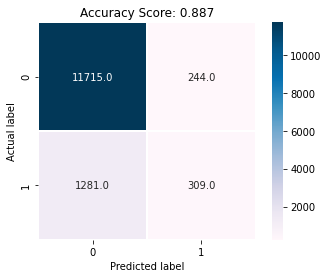

In [ ]:
acc_lr=accuracy_score(y_test,y_pred1)
recall_lr=recall_score(y_test,y_pred1)
precision_lr=precision_score(y_test,y_pred1)
f1score_lr=f1_score(y_test,y_pred1)

print("Confusion Matrix","\n")
score = round(accuracy_score(y_test, y_pred1),3) 
cm1 = confusion_matrix(y_test,y_pred1)
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
print(cm1)
print('\n')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

In [ ]:
generate_model_report(y_test,y_pred1)

Accuracy =  0.8874455679385933
Precision =  0.5587703435804702
Recall =  0.19433962264150945
F1 Score =  0.2883807746150257


In [ ]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11959
           1       0.56      0.19      0.29      1590

    accuracy                           0.89     13549
   macro avg       0.73      0.59      0.61     13549
weighted avg       0.86      0.89      0.86     13549



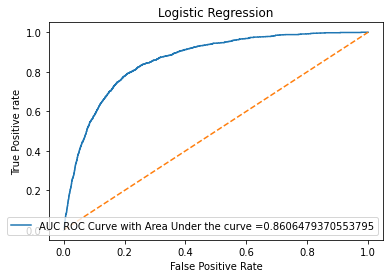

In [ ]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
AUC_LR=auc
plt.title('Logistic Regression')
plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
plt.xlabel('False Positive Rate')  # x-label
plt.ylabel('True Positive rate')  # y-label
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc=4)
plt.show()

#RandomForest Classifier

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(n_estimators=100,n_jobs=100,random_state=0, min_samples_leaf=100)
randomforest.fit(X_train, y_train)
y_pred2 = randomforest.predict(X_test)

#Scoring the model on train data
score_train=randomforest.score(X_train, y_train)
print("Training score: %.2f " % score_train)

#Scoring the model on test_data
score_test=randomforest.score(X_test, y_test)
print("Testing score: %.2f " % score_test)

Training score: 0.90 
Testing score: 0.89 


Confusion Matrix 

[[11874    85]
 [ 1342   248]]




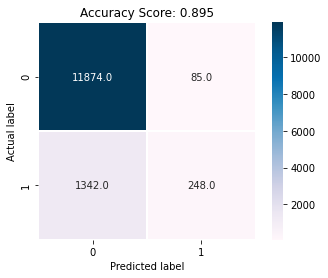

In [ ]:
acc_rf=accuracy_score(y_test,y_pred2)
recall_rf=recall_score(y_test,y_pred2)
precision_rf=precision_score(y_test,y_pred2)
f1score_rf=f1_score(y_test,y_pred2)

print("Confusion Matrix","\n")
score = round(accuracy_score(y_test, y_pred2),3) 
cm1 = confusion_matrix(y_test,y_pred2)
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
print(cm1)
print('\n')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

In [ ]:
generate_model_report(y_test,y_pred2)

Accuracy =  0.8946785740645066
Precision =  0.7447447447447447
Recall =  0.1559748427672956
F1 Score =  0.2579303172126885


In [ ]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11959
           1       0.74      0.16      0.26      1590

    accuracy                           0.89     13549
   macro avg       0.82      0.57      0.60     13549
weighted avg       0.88      0.89      0.86     13549



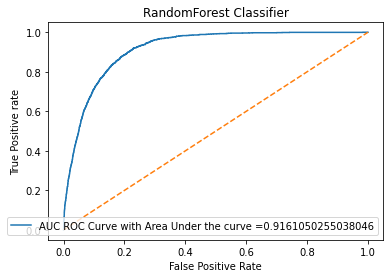

In [ ]:
y_pred_proba = randomforest.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
AUC_RF = auc
plt.title('RandomForest Classifier')
plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
plt.xlabel('False Positive Rate')  # x-label
plt.ylabel('True Positive rate')  # y-label
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc=4)
plt.show()

#KNeighbors Classifier


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 100)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scori

In [ ]:
# check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 79}

In [ ]:
# KNN or k-Nearest Neighbors

knn = KNeighborsClassifier(n_neighbors=79)
knn.fit(X_train, y_train)
y_pred3 = knn.predict(X_test)

#Scoring the model on train data
score_train=knn.score(X_train, y_train)
print("Training score: %.2f " % score_train)

#Scoring the model on test_data
score_test=knn.score(X_test, y_test)
print("Testing score: %.2f " % score_test)

Training score: 0.89 
Testing score: 0.89 


Confusion Matrix 

[[11824   135]
 [ 1353   237]]




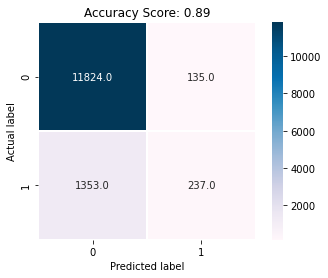

In [ ]:
acc_knn=accuracy_score(y_test,y_pred3)
recall_knn=recall_score(y_test,y_pred3)
precision_knn=precision_score(y_test,y_pred3)
f1score_knn=f1_score(y_test,y_pred3)

print("Confusion Matrix","\n")
score = round(accuracy_score(y_test, y_pred3),3) 
cm1 = confusion_matrix(y_test,y_pred3)
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
print(cm1)
print('\n')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

In [ ]:
generate_model_report(y_test,y_pred3)

Accuracy =  0.8901763967820503
Precision =  0.6370967741935484
Recall =  0.1490566037735849
F1 Score =  0.24159021406727826


In [ ]:
print(classification_report(y_test,y_pred3))


              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11959
           1       0.64      0.15      0.24      1590

    accuracy                           0.89     13549
   macro avg       0.77      0.57      0.59     13549
weighted avg       0.87      0.89      0.86     13549



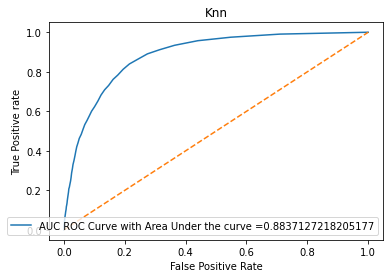

In [ ]:
y_pred_proba = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.title('Knn')
AUC_KN = auc
plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
plt.xlabel('False Positive Rate')  # x-label
plt.ylabel('True Positive rate')  # y-label
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc=4)
plt.show()

In [ ]:
## Best model 


ind=['Logistic regression','Randomforest','KNeighbors']
data={"Accuracy":[acc_lr,acc_rf,acc_knn],"Precision":[precision_lr,precision_rf,precision_knn],"Recall":[recall_lr,recall_rf,recall_knn],
    'f1_score':[f1score_lr,f1score_rf,f1score_knn],"ROC_AUC":[AUC_LR,AUC_RF,AUC_KN]}
result=pd.DataFrame(data=data,index=ind)
result

print("Imbalanced Dataset")
print('\n')
print(result)


Imbalanced Dataset


                     Accuracy  Precision    Recall  f1_score   ROC_AUC
Logistic regression  0.887446   0.558770  0.194340  0.288381  0.860648
Randomforest         0.894679   0.744745  0.155975  0.257930  0.916105
KNeighbors           0.890176   0.637097  0.149057  0.241590  0.883713


In terms of Accuracy and ROC_AUC Randomforest is clear winner with 0.89 and 0.91 score but when looking at Precision & Recall huge difference found and F1_score is high for Logistic refression.

#Random Oversampling for Imbalance Target Feature 

In [ ]:
!pip install imblearn


In [ ]:
#Random Over-Sampling Oversampling can be defined as adding more copies to the minority class. 

from imblearn.over_sampling import RandomOverSampler

os =  RandomOverSampler()
x_new,y_new=os.fit_sample(X,y)

Original dataset shape Counter({0: 39874, 1: 5287})
Resampled dataset shape Counter({0: 39874, 1: 39874})




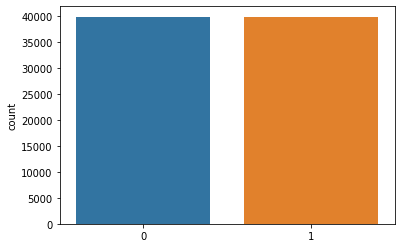

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
print('\n')
sns.countplot(y_new)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score

#dividing the dataset into training and testing
X_train_b,X_test_b,y_train_b,y_test_b=train_test_split(x_new,y_new,test_size=0.33, random_state=42)
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=0)

print(X_train_b.shape,X_test_b.shape,y_train_b.shape,y_test_b.shape)

(53431, 14) (26317, 14) (53431,) (26317,)


In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_b=scaler.fit_transform(X_train_b)
X_test_b=scaler.transform(X_test_b)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


model=LogisticRegression()
model.fit(X_train_b,y_train_b)
y_pred1=model.predict(X_test_b)

#Scoring the model on train data
score_train=model.score(X_train_b, y_train_b)
print("Training score: %.2f " % score_train)

#Scoring the model on test_data
score_test=model.score(X_test_b, y_test_b)
print("Testing score: %.2f " % score_test)

Training score: 0.80 
Testing score: 0.79 


Confusion Matrix 

[[10640  2545]
 [ 2870 10262]]




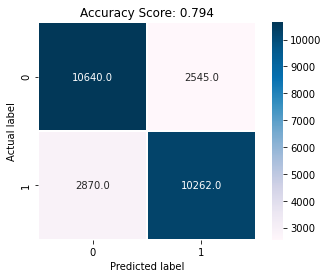

In [ ]:
acc_lr_b=accuracy_score(y_test_b,y_pred1)
recall_lr_b=recall_score(y_test_b,y_pred1)
precision_lr_b=precision_score(y_test_b,y_pred1)
f1score_lr_b=f1_score(y_test_b,y_pred1)

print("Confusion Matrix","\n")
score = round(accuracy_score(y_test_b, y_pred1),3) 
cm1 = confusion_matrix(y_test_b,y_pred1)
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
print(cm1)
print('\n')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

In [ ]:
generate_model_report(y_test_b,y_pred1)

Accuracy =  0.7942394649846107
Precision =  0.8012805496993831
Recall =  0.7814498933901919
F1 Score =  0.7912409884729558


In [ ]:
print(classification_report(y_test_b,y_pred1))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80     13185
           1       0.80      0.78      0.79     13132

    accuracy                           0.79     26317
   macro avg       0.79      0.79      0.79     26317
weighted avg       0.79      0.79      0.79     26317



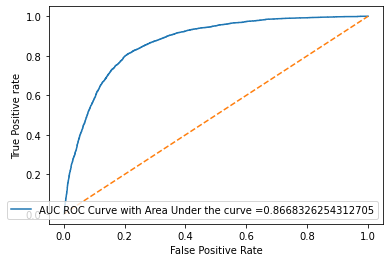

In [ ]:
y_pred_proba = model.predict_proba(X_test_b)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test_b,  y_pred_proba)
auc = metrics.roc_auc_score(y_test_b, y_pred_proba)
AUC_LR_b = auc
plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
plt.xlabel('False Positive Rate')  # x-label
plt.ylabel('True Positive rate')  # y-label
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc=4)
plt.show()

#RandomForest Classifier

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(n_estimators=100,n_jobs=100,random_state=0, min_samples_leaf=100)
randomforest.fit(X_train_b, y_train_b)
y_pred2 = randomforest.predict(X_test_b)

#Scoring the model on train data
score_train=randomforest.score(X_train_b, y_train_b)
print("Training score: %.2f " % score_train)

#Scoring the model on test_data
score_test=randomforest.score(X_test_b, y_test_b)
print("Testing score: %.2f " % score_test)

Training score: 0.86 
Testing score: 0.86 


Confusion Matrix 

[[10713  2472]
 [ 1261 11871]]




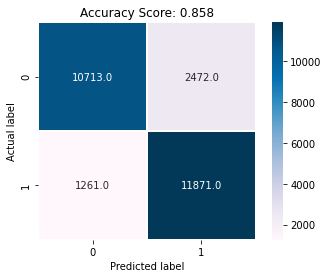

In [ ]:

acc_rf_b=accuracy_score(y_test_b,y_pred2)
recall_rf_b=recall_score(y_test_b,y_pred2)
precision_rf_b=precision_score(y_test_b,y_pred2)
f1score_rf_b=f1_score(y_test_b,y_pred2)

print("Confusion Matrix","\n")
score = round(accuracy_score(y_test_b, y_pred2),3) 
cm1 = confusion_matrix(y_test_b,y_pred2)
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
print(cm1)
print('\n')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

In [ ]:
generate_model_report(y_test_b,y_pred2)

Accuracy =  0.8581525249838508
Precision =  0.8276511190127588
Recall =  0.9039750228449589
F1 Score =  0.8641310282074612


In [ ]:
print(classification_report(y_test_b,y_pred2))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85     13185
           1       0.83      0.90      0.86     13132

    accuracy                           0.86     26317
   macro avg       0.86      0.86      0.86     26317
weighted avg       0.86      0.86      0.86     26317



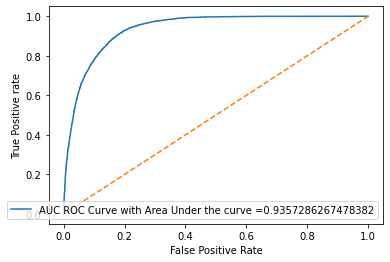

In [ ]:
y_pred_proba = randomforest.predict_proba(X_train_b)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_train_b,  y_pred_proba)
auc = metrics.roc_auc_score(y_train_b, y_pred_proba)
AUC_RF_b = auc
plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
plt.xlabel('False Positive Rate')  # x-label
plt.ylabel('True Positive rate')  # y-label
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc=4)
plt.show()

#KNeighbors Classifier


In [ ]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=79)
knn.fit(X_train_b, y_train_b)
y_pred3 = knn.predict(X_test_b)

#Scoring the model on train data
score_train=knn.score(X_train_b, y_train_b)
print("Training score: %.2f " % score_train)

#Scoring the model on test_data
score_test=knn.score(X_test_b, y_test_b)
print("Testing score: %.2f " % score_test)

Training score: 0.82 
Testing score: 0.81 


Confusion Matrix 

[[10950  2235]
 [ 2681 10451]]




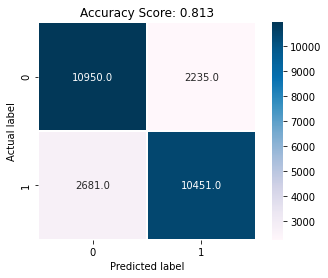

In [ ]:
acc_knn_b=accuracy_score(y_test_b,y_pred3)
recall_knn_b=recall_score(y_test_b,y_pred3)
precision_knn_b=precision_score(y_test_b,y_pred3)
f1score_knn_b=f1_score(y_test_b,y_pred3)

print("Confusion Matrix","\n")
score = round(accuracy_score(y_test_b, y_pred3),3) 
cm1 = confusion_matrix(y_test_b,y_pred3)
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
print(cm1)
print('\n')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

In [ ]:
generate_model_report(y_test_b,y_pred3)

Accuracy =  0.8132005927727325
Precision =  0.8238215355510011
Recall =  0.7958422174840085
F1 Score =  0.8095902083817493


In [ ]:
print(classification_report(y_test_b,y_pred3))


              precision    recall  f1-score   support

           0       0.80      0.83      0.82     13185
           1       0.82      0.80      0.81     13132

    accuracy                           0.81     26317
   macro avg       0.81      0.81      0.81     26317
weighted avg       0.81      0.81      0.81     26317



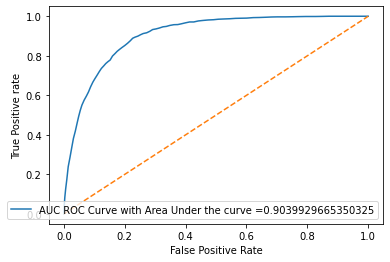

In [ ]:
y_pred_proba = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
AUC_KN_b = auc
plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
plt.xlabel('False Positive Rate')  # x-label
plt.ylabel('True Positive rate')  # y-label
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc=4)
plt.show()

In [ ]:
## Best model 

ind=['Logistic regression','Randomforest','KNeighbors']
data={"Accuracy":[acc_lr_b,acc_rf_b,acc_knn_b],"Precision":[precision_lr_b,precision_rf_b,precision_knn_b],"Recall":[recall_lr_b,recall_rf_b,recall_knn_b],
    'f1_score':[f1score_lr_b,f1score_rf_b,f1score_knn_b],"ROC_AUC":[AUC_LR_b,AUC_RF_b,AUC_KN_b]}
result=pd.DataFrame(data=data,index=ind)
result

print('Balanced Dataset')
print('\n')
print(result)

Balanced Dataset


                     Accuracy  Precision    Recall  f1_score   ROC_AUC
Logistic regression  0.794239   0.801281  0.781450  0.791241  0.866833
Randomforest         0.858153   0.827651  0.903975  0.864131  0.935729
KNeighbors           0.813201   0.823822  0.795842  0.809590  0.903993


The model with highest Accuracy & roc_auc_acore is consider as a best model.
From above 3 model RandomForest Classifier having score of 0.85 & 0.93 and also f1_score is highest for Randomforest model which 0.86 which is highest among all.

In [ ]:
# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

feature_scores

duration     0.295055
balance      0.112805
age          0.110033
day          0.103650
month        0.087797
poutcome     0.057560
job          0.052230
campaign     0.041342
previous     0.030505
education    0.029725
housing      0.027330
marital      0.022742
contact      0.019118
loan         0.010107
dtype: float64

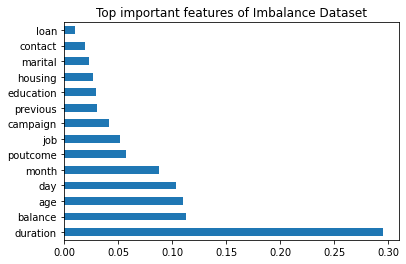

In [ ]:
feature_scores.nlargest(20).plot(kind='barh')
plt.title("Top important features of Imbalance Dataset")
plt.show()

Important features we are going to consider for machine learning models:  
* duration  
* balance  
* age  
* day  
* month  
* poutcome
* job  
* compaign  

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
clf.fit(X_train_b, y_train_b)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

feature_scores

duration     0.378727
month        0.090085
balance      0.088883
age          0.084932
day          0.080154
poutcome     0.043411
previous     0.038457
job          0.038220
housing      0.036808
campaign     0.034535
contact      0.034200
education    0.023009
marital      0.017862
loan         0.010717
dtype: float64

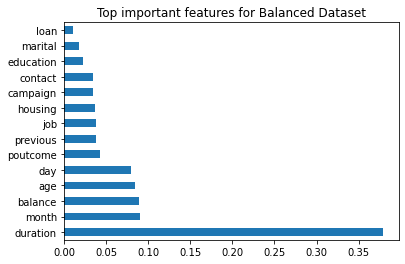

In [ ]:
feature_scores.nlargest(20).plot(kind='barh')
plt.title("Top important features for Balanced Dataset")
plt.show()

Important features we are going to consider for machine learning models:  
* duration  
* month
* balance
* age  
* day  
* poutcome
* previous 
* job  

**Proposed solutions for the Next Marketing Campaign :**

- Months of Marketing Activity: For the next marketing campaign, it will be wise for the bank to focus the marketing campaign during the months of March, September, October, and December. (December should be under consideration because it was the month with the lowest marketing activity, there might be a reason why December is the lowest.)

- Campaign Calls: A policy should be implemented that states that no more than 3 calls should be applied to the same potential client. Remember, the more we call the same potential client, the higher the likelihood he or she will decline to open a term deposit. This might be as a result of a potential client getting tired/pissed at being disturbed. It also saves us time and effort in getting new potential clients.

- Age Category: The customer's age affects campaign outcome as well. The next marketing campaign of the bank should target potential clients in their 20s or younger and 60s or older. This will increase the likelihood of more term deposits subscriptions.

- Occupation: Potential clients that were students or retired were the most likely to subscribe to a term deposit. Retired individuals, tend to have more term deposits in order to gain some cash through interest payments. Retired individuals tend to not spend so much of their money as responsibilities are usually reduced, so they are more likely to lend it to the financial institution. Students were the other group that used to subscribe to term deposits.

- Balances: We see those potential clients on average and high balances are more likely to open a term deposit. Lastly, the next marketing campaign should focus on individuals of average and high balances in order to increase the likelihood of subscribing to a term deposit as they have more money to spare.


**Conclusion :**

- From the study conducted, the results are impressive and convincing in terms of using a machine-learning algorithm to decide on the marketing campaign of the bank. Among the three classification approach used to model the data, we found that Accuracy and AUC ROC score is high for almost all models whether it is for balanced or Imbalance dataset.
 - Random Forest with balance set is highest with 93% of AUC ROC score.
 - Random Forest and Knn with Imbalance set both contain 89% of Accuracy.
- But for fair model performance among all balance and Imbalance datasets, we decided the best model using F1 Score here also Random Forest is the clear winner on balance dataset with a score of 86%.
- And also when we talk about Balance data set comparison Random Forest is the best model in all Evaluation metrics.
- Further, we can also improve using hyper tuning on our Algorithm to get the most out of it but Hyper Tuning consumes a lot of time and resources of the system depending upon how big the Data we have and what algorithm we're using. It will go through a number of Iterations and try to come up with the best possible value for us. 
- The bank marketing manager can identify the potential client by using the model if the client’s information like education, housing loan, Personal loan, duration of the call, number of contacts performed during this campaign, previous outcomes, etc is available. This will help the bank to predict the success of subscribing to a long-term deposit even before the telemarketing call is executed.
- Thank you for your time.
